In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
import seaborn
%matplotlib inline

In [2]:
df_w = pd.read_csv("../data/PreProcessed/MixWine.csv")
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_name
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_name             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
#First look shows that we have objects for wine_name so we will convert that into integers and change to wine_type 

## From Red/White to 0/1 

In [5]:
#red = 0, white = 1 beacuse of alphabetic order

In [6]:
df = df_w.copy()
df.rename(columns ={"wine_name": "wine_type"}, inplace = True)
df['wine_type'].replace({"red": 0, "white": 1}, inplace=True)

In [7]:
#now we have our data set with only numerical values
df.describe() 
#average of .75 for wine_type shows that we must be careful from now on because the result may be skewed 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


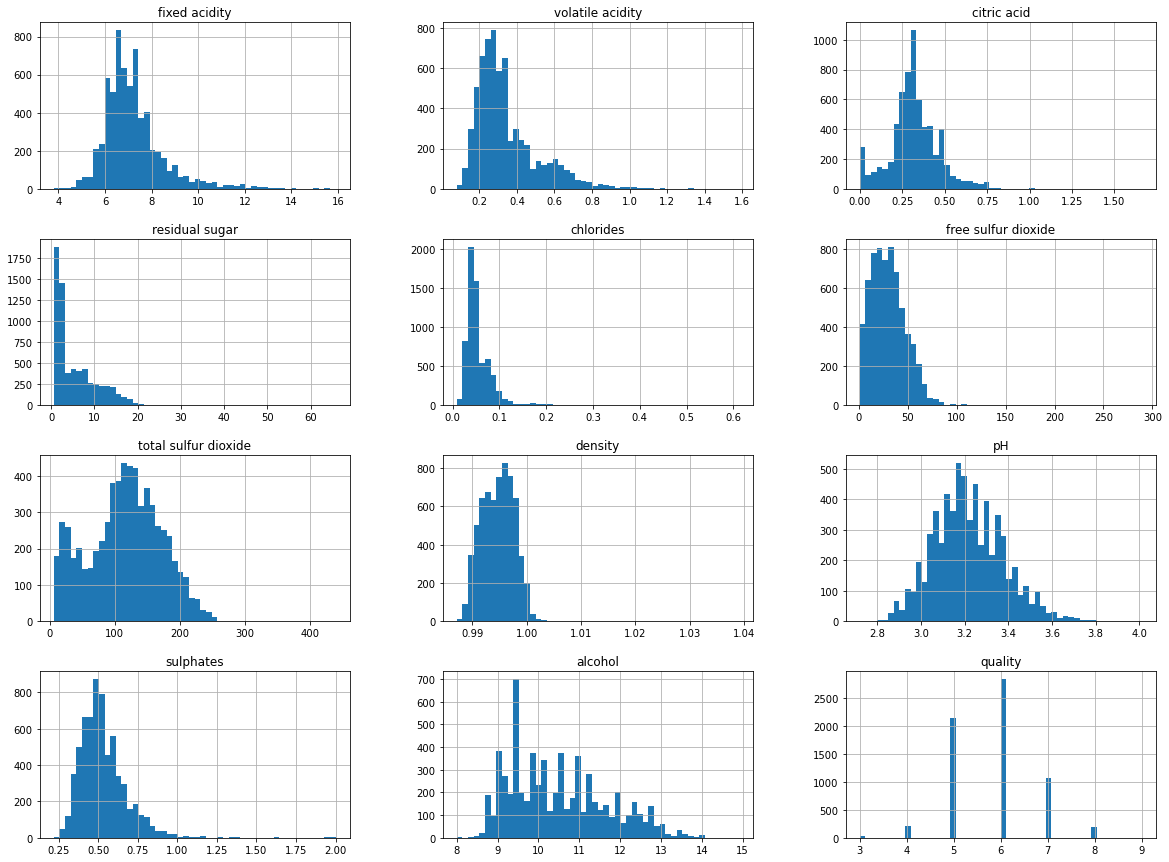

In [8]:
df_w.hist(bins=50, figsize=(20,15))
plt.show()

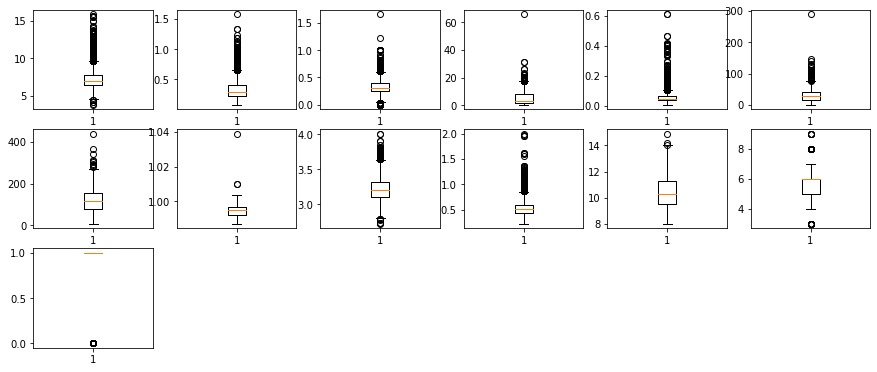

In [9]:
col= df.columns #storing the columns' name
plt.figure(figsize=(15,15))
for i in range(len(col)):
    plt.subplot(7,6,i+1)
    plt.boxplot(df[col[i]])
    #plt.xlabel('Colomns')
    #plt.ylabel('Values')

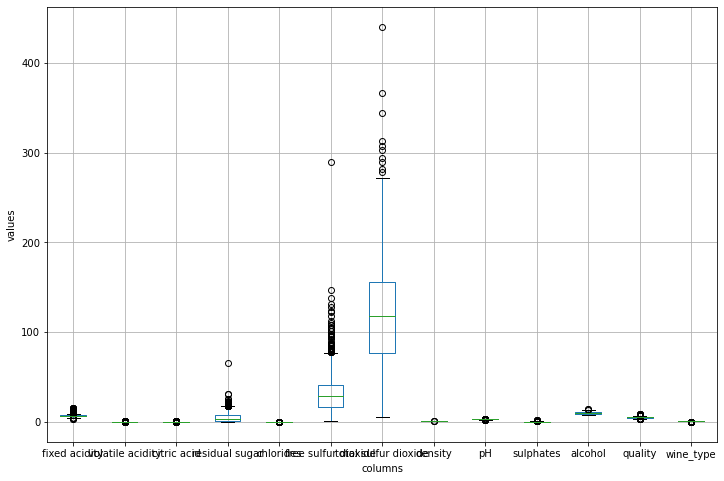

In [10]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xlabel('columns')
plt.ylabel('values')
plt.show()

In [11]:
c_m = df.corr() #correlation matrix
col= df.columns #storing the columns' name
n = 1 #which column - you can change it
c_m[col[n]].sort_values(ascending=False), print("colunm {}".format(n))

colunm 1


(volatile acidity        1.000000
 chlorides               0.377124
 density                 0.271296
 pH                      0.261454
 sulphates               0.225984
 fixed acidity           0.219008
 alcohol                -0.037640
 residual sugar         -0.196011
 quality                -0.265699
 free sulfur dioxide    -0.352557
 citric acid            -0.377981
 total sulfur dioxide   -0.414476
 wine_type              -0.653036
 Name: volatile acidity, dtype: float64,
 None)

In [28]:
c_m #let's see which variables are correlated

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


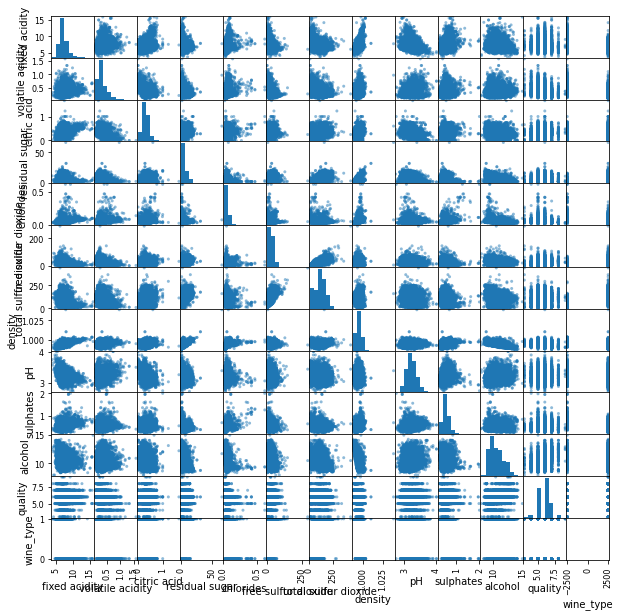

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], figsize=(10, 10))
plt.axis('equal')
plt.show()

## PCA

In [13]:
#here we analyse our dataset thanks to principal component analysis

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()

pca.fit(scale(df)) #normalise the dataset (X-means / sd)

eig, eig_ratio = pca.explained_variance_, pca.explained_variance_ratio_ #eigthen values 

p_c = pca.components_ #principal components

print(eig)

[3.83460376 2.6633878  1.64181893 1.08067388 0.84988344 0.66097971
 0.57305182 0.5210577  0.47053568 0.30589834 0.25681457 0.11928361
 0.024012  ]


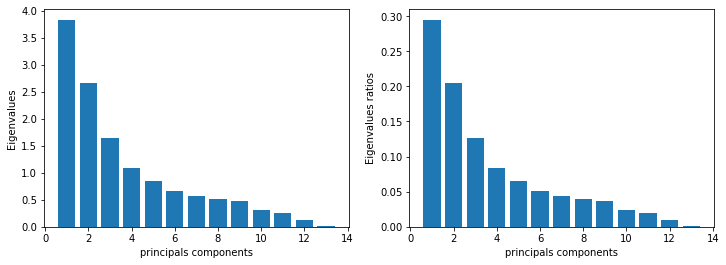

In [15]:
ind = np.arange(1, len(eig) + 1)
plt.figure(figsize = (12,4))
plt.subplot(121), plt.bar(ind, eig)
plt.xlabel('principals components')
plt.ylabel('Eigenvalues')
plt.subplot(122),plt.bar(ind, eig_ratio)
plt.xlabel('principals components')
plt.ylabel('Eigenvalues ratios')
plt.show()

In [16]:
#Thanks to the ratio we can choose the number of components 
np.sum(eig_ratio[0:4]) #with Scree plot selection we keep 71 to 77% of the total variances

0.7091588599425859

In [25]:
type(col)

pandas.core.indexes.base.Index

In [27]:
number_component = 4 #number retain

c_v = np.sqrt(eig) * p_c #contributions
#c_v[:, 0]
#for i in range(len(col)):
 #   print(f'contribution values {i}',c_v[i])
cv_df = pd.DataFrame(c_v)
cv_df.rename(columns ={0: "contribution to ax0",1: "contribution to ax1",2: "contribution to ax3",3: "contribution to ax3",4: "contribution to ax4"}, inplace = True)
cv_df = cv_df.iloc[:, :5]

cv_df.index = col #rows here are the variables i.e the columns
cv_df

,contribution to ax0,contribution to ax1,contribution to ax3,contribution to ax3,contribution to ax4
fixed acidity,0.509581,0.593694,-0.145039,-0.241981,0.278862
volatile acidity,0.424889,0.066313,0.211756,0.405417,0.197851
citric acid,0.918708,-0.452935,0.752854,-0.079958,0.045188
residual sugar,-0.298075,-0.161399,0.071575,0.146520,0.108808
chlorides,0.321551,0.221422,-0.290906,0.521810,-0.394525
free sulfur dioxide,-0.050929,0.624230,-0.453804,0.054836,0.384014
total sulfur dioxide,0.757522,0.657605,0.135766,-0.144352,-0.416858
density,0.062299,-0.296958,-0.529650,-0.031685,-0.378135
pH,-0.642488,0.443382,0.372465,0.493415,0.078242
sulphates,0.213238,-0.848119,-0.319987,0.246936,0.153743


In [ ]:
#we see the contribution of the attributes to the principal components

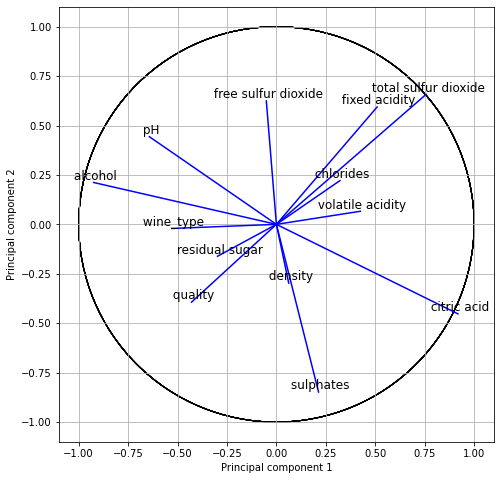

In [19]:
#here we plot the correlation circle to visualise the axes that reprent best each variable
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

for i, (x, y) in enumerate(zip(c_v[:, 0], c_v[:, 1])): #c_v[:, 0], c_v[:, 1] 0&1 can be replaced by any int < 5
    ax.add_artist(plt.Circle((0, 0), 1, fill=False, linestyle='-', color='k'))
    ax.plot([0, x], [0, y], linestyle='-', color='b')
    ax.text(x, y, f' {col[i]}', fontsize=12, ha='center', va='bottom', color='black')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.grid()
plt.show()